In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Dades d'accidents_de_transit a nivell estatal
es_xlsx_data = pd.read_excel('./data/2021.Accidentes_de_Tráfico.xlsx')
df_es = pd.DataFrame(es_xlsx_data )

In [24]:
# Traiem el tipus de drogues detectades
df_es = data.drop(labels = ["Ketamina", "Psicofármacos","Benzodiacepinas", "Antipsicóticos", "Antidepresivos", "Antiepilépticos", "Opioides",
                           "Etanol", "Drogas", "Cocaína", "Cannabis", "Opiáceos", "Anfetamina y relacionados"], axis=1)
df_es.head()

,Año,Fecha,Territorio INTCF,CCAA,Provincia,Organismo,Zona,Rol siniestro,Tipo vehículo,Rango edad,Sexo,Resultado toxicológico,Víctimas mortales,Víctimas toxi. positivo,Resultados toxi. positivos
0,2021,2021-01-04,INTCF-Barcelona,Aragón,Zaragoza,IML-Aragón,Vías interurbanas,Pasajero,Turismo sin remolque,65 o más,Mujer,Positivo,1,1,1
1,2021,2021-01-13,INTCF-Barcelona,Aragón,Huesca,IML-Aragón,Vías interurbanas,Conductor,Camión <=3.500 kg sin remolque,55-64,Hombre,Negativo,1,0,0
2,2021,2021-02-11,INTCF-Barcelona,Aragón,Zaragoza,IML-Aragón,Vías interurbanas,Conductor,Turismo sin remolque,35-44,Hombre,Positivo,1,1,1
3,2021,2021-02-18,INTCF-Barcelona,Aragón,Zaragoza,IML-Aragón,Vías urbanas,Peatón,Peatón,65 o más,Mujer,Negativo,1,0,0
4,2021,2021-02-19,INTCF-Barcelona,Aragón,Huesca,IML-Aragón,Vías interurbanas,Conductor,Turismo sin remolque,25-34,Hombre,Negativo,1,0,0


In [26]:
# Dades d'accidents de transit amb morts o ferits greus a Catalunya
df_cat = pd.read_csv("./data/Accidents_de_tr_nsit_amb_morts_o_ferits_greus_a_Catalunya.csv")
df_cat.head()

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,...,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
0,2010,Zona urbana,25/01/2010,SE,999999.0,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",Feiners,23.33,Nit,Col.lisió de vehicles en marxa,dill-dij
1,2010,Carretera,31/10/2010,N-240,99.9,LLEIDA,Segria,Lleida,0,1,...,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1.00,Nit,Sortida de la calcada sense especificar,dg
2,2010,Carretera,17/05/2010,N-II,708.7,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Sec i net,Carretera convencional,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,15.27,Tarda,Col.lisió de vehicles en marxa,dill-dij
3,2010,Zona urbana,21/08/2010,SE,999999.0,BARCELONA,Barcelones,Barcelona,0,2,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,22.30,Nit,Col.lisió de vehicles en marxa,dis
4,2010,Zona urbana,07/05/2010,SE,999999.0,BADALONA,Barcelones,Barcelona,0,1,...,Sec i net,Via urbana( inclou carrer i carrer residencial),NaN,NaN,"Calma, vent molt suau",CapDeSetmana,17.45,Tarda,Bolcada a la calcada,div


In [68]:
df_es_provincia = df_es.groupby("Provincia").sum()
df_es_provincia = df_es_provincia.sort_values('Víctimas mortales')

C:\Users\sara-\AppData\Local\Temp\ipykernel_13768\682125331.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


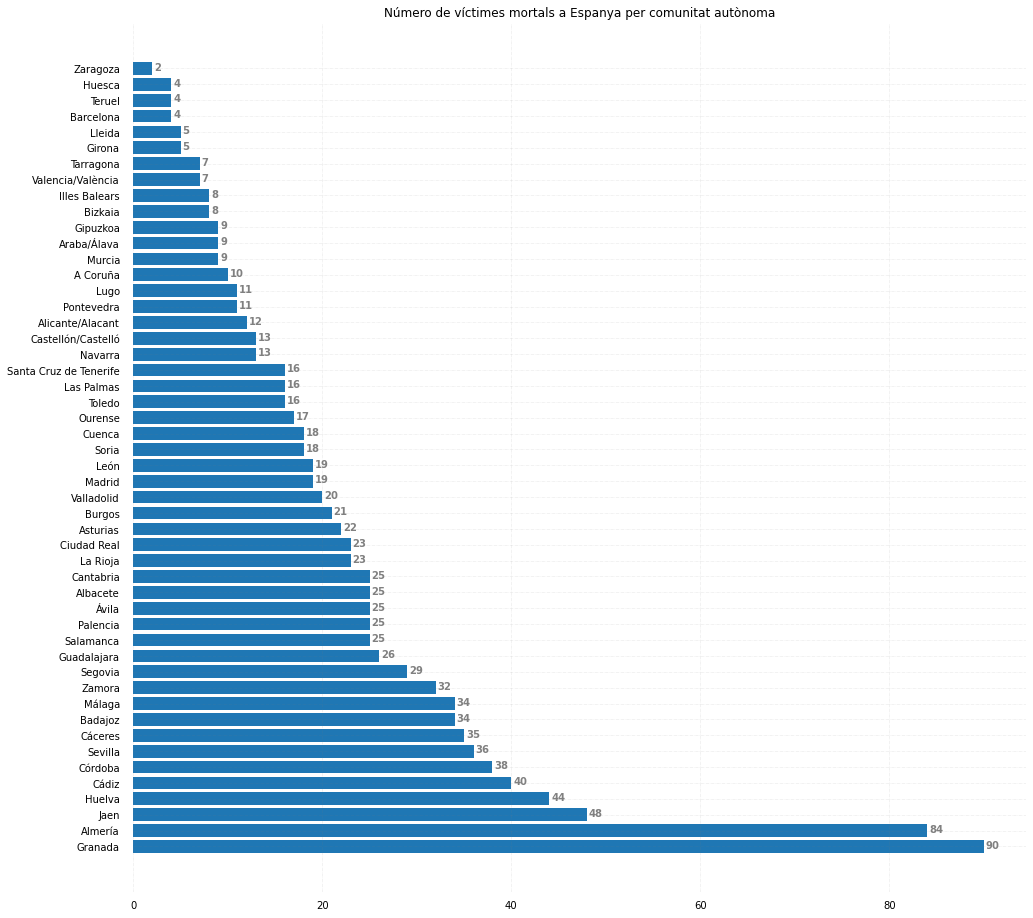

In [67]:
# Visualitzacions
# Víctimes mortals per província

# Figure Size
fig, ax = plt.subplots(figsize =(16, 16))
 
# Horizontal Bar Plot

ax.barh(df_es['Provincia'].unique(), df_es_provincia['Víctimas mortales'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Número de víctimes mortals a Espanya per comunitat autònoma al 2021',
             loc ='center', )
 
# Show Plot
plt.show()

Text(0, 0.5, 'Frequency')

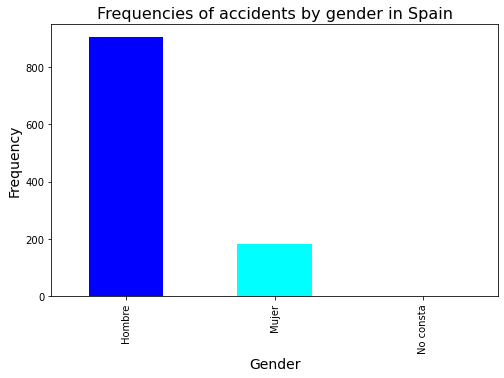

In [75]:
# Numero d'accidents per gènere utilitzant un bar plot
frequency_gender = df_es.Sexo.value_counts()
frequency_gender.plot(kind='bar',color=['blue','cyan'],figsize=(8,5))

# labels and title
plt.title('Frequencies of accidents by gender in Spain',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

Text(0, 0.5, 'Frequency')

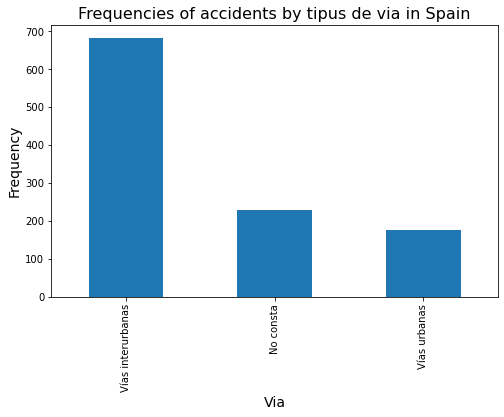

In [77]:
frequency_zona = df_es.Zona.value_counts()
frequency_zona

# Numero d'accidents per gènere utilitzant un bar plot

frequency_zona.plot(kind='bar',figsize=(8,5))

# labels and title
plt.title('Frequencies of accidents by tipus de via in Spain',fontsize=16)
plt.xlabel('Via',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

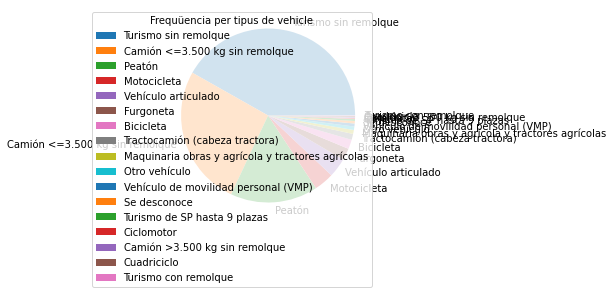

<Figure size 432x288 with 0 Axes>

In [85]:
# Frequencia vehicle
y = df_es['Tipo vehículo'].value_counts()
mylabels = df_es['Tipo vehículo'].unique()

plt.pie(y, labels = mylabels)
plt.legend(title = "Freqüencia per tipus de vehicle")
plt.show()

plt.savefig("vehicle.png")

In [ ]:
#Tipo vehículo
frequency_vehiculo = df_es['Tipo vehículo'].value_counts()
frequency_vehiculo.plot(kind='bar',figsize=(8,5))

plt.title('Frequencies of accidents by tipus de via in Spain',fontsize=16)
plt.xlabel('Via',fontsize=14)
plt.ylabel('Frequency',fontsize=14)